In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
import os
print(os.getcwd())

C:\Users\Anwender\Desktop\Nicolas\Dokumente\FH Bielefeld\Optimierung und Simulation\2. Semester\OuS_Projekt


In [17]:
file_nse1 = "benchmark_nse1.csv"
file_nse2 = "benchmark_nse2.csv"
file_nse3 = "benchmark_nse3.csv"
df_nse1 = pd.read_csv(file_nse1, sep=",")
df_nse2 = pd.read_csv(file_nse2, sep=",")
df_nse3 = pd.read_csv(file_nse3, sep=",")

In [7]:
df_nse1

,Epochs,Time,Best Action,Best Residuum
0,1000.0,3.794,[0.00037948],[0.00075889]
1,5000.0,15.402,[2.45503616e-05],[4.91004217e-05]
2,10000.0,39.177,[-3.29602044e-05],[6.59209519e-05]
3,50000.0,548.275,[0.00031125],[0.00062244]


In [8]:
# Entferne die Klammern und konvertiere den Wert in einen float
# Klammern entfernen und versuchen, die Werte in float umzuwandeln
df_nse1['Best Residuum'] = df_nse1['Best Residuum'].str.replace('[', '').str.replace(']', '').astype(float)
df_nse1

,Epochs,Time,Best Action,Best Residuum
0,1000.0,3.794,[0.00037948],0.000759
1,5000.0,15.402,[2.45503616e-05],0.000049
2,10000.0,39.177,[-3.29602044e-05],0.000066
3,50000.0,548.275,[0.00031125],0.000622


In [18]:
df_nse2

,Epochs,Time,Best Action,Best Residuum,Best Action global optimum,Best Residuum global optimum
0,1000.0,3.305,[0.99306941 0.97132391],0.148791,[1.02104425 1.00144994],0.021094
1,5000.0,9.898,[1.061149 1.14505315],0.199749,[0.95667106 1.02900386],0.052140
2,10000.0,15.447,[0.91975319 0.83422208],0.142072,[0.98611528 1.01858294],0.023197
3,50000.0,107.568,[0.89070129 0.79465717],0.110079,[1.02101529 1.02270281],0.030936


In [10]:
df_nse3

,Epochs,Time,Best Action,Best Residuum,Best Action global optimum,Best Residuum global optimum
0,1000.0,3.052,[ 0.20851724 -0.70492524 -0.95495832 -1.074920...,0.599192,[-0.42215803 0.47344273 1.16680813 0.444447...,1.236441
1,5000.0,9.145,[ 1.21705711e+00 -9.09651875e-01 -3.20530623e-...,0.714767,[-1.28149045 1.05576217 1.03962255 0.902828...,1.550485
2,10000.0,16.307,[ 0.30322015 0.3009665 -0.45381281 0.662307...,0.716097,[-1.2317704 -0.01960332 0.61424005 0.508484...,1.122834
3,50000.0,97.955,[ 0.04569374 0.46469676 -1.27218056 0.041097...,0.599234,[-1.02301824 0.54737759 0.97858799 0.424556...,1.373325


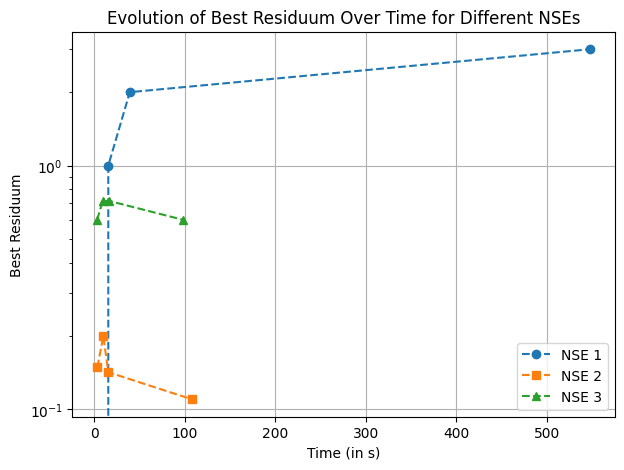

In [20]:
# Daten aus dem ersten DataFrame extrahieren
time_bestres_nse1 = df_nse1[["Time", "Best Residuum"]]
time_nse1 = time_bestres_nse1["Time"]
best_res_nse1 = time_bestres_nse1["Best Residuum"]

# Daten aus dem zweiten DataFrame extrahieren
time_bestres_nse2 = df_nse2[["Time", "Best Residuum"]]
time_nse2 = time_bestres_nse2["Time"]
best_res_nse2 = time_bestres_nse2["Best Residuum"]

# Daten aus dem dritten DataFrame extrahieren
time_bestres_nse3 = df_nse3[["Time", "Best Residuum"]]
time_nse3 = time_bestres_nse3["Time"]
best_res_nse3 = time_bestres_nse3["Best Residuum"]

# Größe festlegen
plt.figure(figsize=(7,5))

# Plot erstellen
plt.plot(time_nse1, best_res_nse1, "o", label="NSE 1", linestyle="--")
plt.plot(time_nse2, best_res_nse2, "s", label="NSE 2", linestyle="--")
plt.plot(time_nse3, best_res_nse3, "^", label="NSE 3", linestyle="--")

# Plot beschriften und anzeigen
plt.xlabel("Time (in s)")
plt.ylabel("Best Residuum")
plt.grid()
plt.yscale("log")
plt.legend()
plt.title("Evolution of Best Residuum Over Time for Different NSEs")
plt.show()

In [12]:
def linear_relationship(dataframe):
    """
    Berechnet den linearen Zusammenhang zwischen Zeit und Epochen für einen DataFrame.

    Args:
    dataframe (pd.DataFrame): Ein DataFrame mit den Spalten 'Time' und 'Epochs'.

    Returns:
    dict: Ein Dictionary mit den Ergebnissen des linearen Zusammenhangs.
          Enthält die Slope, Intercept, Korrelationskoeffizient (r), P-Wert und Standardfehler.
    """

    results = {}

    try:
        # Berechne den linearen Zusammenhang
        slope, intercept, r_value, p_value, std_err = linregress(dataframe["Time"], dataframe["Epochs"])

        # Speichere die Ergebnisse in einem Dictionary
        results["Slope"] = slope
        results["Intercept"] = intercept
        results["Korrelationskoeffizient (r)"] = r_value
        results["P-Wert"] = p_value
        results["Standardfehler"] = std_err

    except Exception as e:
        # Fangen Sie alle Fehler ab und geben Sie eine Fehlermeldung aus
        results["Error"] = str(e)

    return results

In [13]:
# Beispielaufruf für DataFrame df_nse1
results_nse1 = linear_relationship(df_nse1)
print("Ergebnisse für DataFrame df_nse1:")
print(results_nse1)
print("---"*50)

# Beispielaufruf für DataFrame df_nse2
results_nse2 = linear_relationship(df_nse2)
print("Ergebnisse für DataFrame df_nse2:")
print(results_nse2)
print("---"*50)

# Beispielaufruf für DataFrame df_nse1
results_nse3 = linear_relationship(df_nse3)
print("Ergebnisse für DataFrame df_nse3:")
print(results_nse3)

Ergebnisse für DataFrame df_nse1:
{'Slope': 84.97044105909531, 'Intercept': 3613.2129680954877, 'Korrelationskoeffizient (r)': 0.9941223838379178, 'P-Wert': 0.005877616162082155, 'Standardfehler': 6.543190082385486}
------------------------------------------------------------------------------------------------------------------------------------------------------
Ergebnisse für DataFrame df_nse2:
{'Slope': 453.75281124205907, 'Intercept': 611.2781233452497, 'Korrelationskoeffizient (r)': 0.9992402086583827, 'P-Wert': 0.0007597913416172996, 'Standardfehler': 12.514516880438658}
------------------------------------------------------------------------------------------------------------------------------------------------------
Ergebnisse für DataFrame df_nse3:
{'Slope': 507.55284706101645, 'Intercept': 453.84362837773006, 'Korrelationskoeffizient (r)': 0.9991356655512559, 'P-Wert': 0.0008643344487441197, 'Standardfehler': 14.931514257422979}


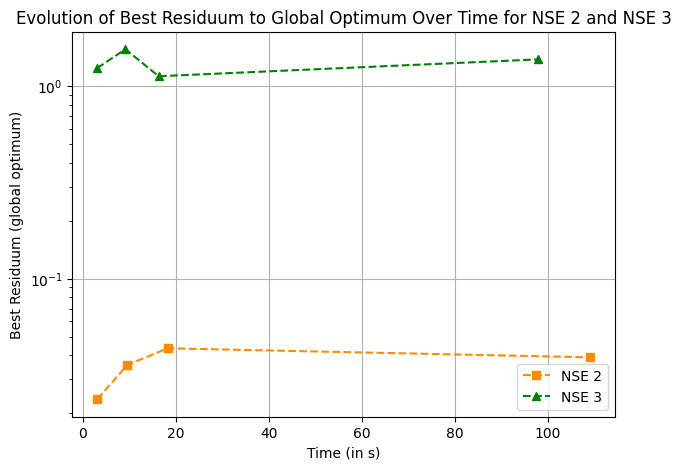

In [14]:
# plot best residuum global optimum
best_res_opt_nse2 = df_nse2[["Best Residuum global optimum"]]
best_res_opt_nse3 = df_nse3[["Best Residuum global optimum"]]

# Größe festlegen
plt.figure(figsize=(7,5))

#plt.plot(time_nse1, best_res_nse1, "o", label="NSE 1", linestyle="--")
plt.plot(time_nse2, best_res_opt_nse2, "s", label="NSE 2", linestyle="--", color="darkorange")
plt.plot(time_nse3, best_res_opt_nse3, "^", label="NSE 3", linestyle="--", color="green")

# Plot beschriften und anzeigen
plt.xlabel("Time (in s)")
plt.ylabel("Best Residuum (global optimum)")
plt.grid()
plt.yscale("log")
plt.legend()
plt.title("Evolution of Best Residuum to Global Optimum Over Time for NSE 2 and NSE 3")
plt.show()

In [19]:
file_newton_nse1 = "benchmark_newton_results_nse1.csv"
file_newton_nse2 = "benchmark_newton_results_nse2.csv"
df_newton_nse1 = pd.read_csv(file_newton_nse1, sep=",")
df_newton_nse2 = pd.read_csv(file_newton_nse2, sep=",")

desired_precision = 30

def format_float(val):
    return f'{val:.{desired_precision}f}'

# Setze die Anzeigeoption für Floats
pd.options.display.float_format = format_float

FileNotFoundError: [Errno 2] No such file or directory: 'benchmark_newton_results_nse1.csv'

In [16]:
df_newton_nse1

NameError: name 'df_newton_nse1' is not defined

In [ ]:
df_newton_nse2